# Solar Orbiter HET data

In [1]:
import speasy as spz
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Define the start and stop time of the desired data.

In [2]:
start = "2020-11-28T00:00:00"
stop = "2020-12-05T00:00:00"

## Solar Orbiter electron flux
Viewing the electron flux data measured by the instrument. First download the data from AMDA.

In [3]:
solo_eflux = spz.get_data("amda/solo_het_omni_eflux", start, stop)

Notice that the sampling rate in the original data is not regular.

In [4]:
print(np.unique(np.diff(solo_eflux.time), return_counts=True))

(array([1.        , 1.00099993, 1.00100017]), array([603798,    696,    304]))


Plot the resampled data and its mean value over a window of 10 minutes.

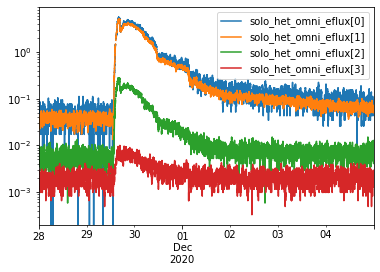

In [5]:
eflux_df = solo_eflux.to_dataframe(datetime_index=True)
# resample to 1s
eflux_df = eflux_df.resample("1s").ffill()
eflux_df.rolling(600).mean().plot()
plt.yscale("log")

## Solar Orbiter proton flux
Viewing the proton flux data measured by the instrument. First download the data from AMDA.

In [6]:
solo_hflux = spz.get_data("amda/solo_het_omni_hhcflux", start, stop)

In [7]:
print(np.unique(np.diff(solo_eflux.time), return_counts=True))

(array([1.        , 1.00099993, 1.00100017]), array([603798,    696,    304]))


Plot the resampled data and the mean value on a 10 minute window.

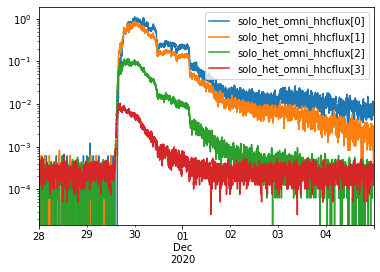

In [8]:
hflux_df = solo_hflux.to_dataframe(datetime_index=True)
# resample to 1s
hflux_df = hflux_df.resample("1s").ffill()
hflux_df.rolling(600).mean().plot()
plt.yscale("log")

## Spectral plot
View the data on a spectro plot. Lets define the `spectro_plot` function that takes a parameter id, start and stop time and produces the figure.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import speasy as spz
import matplotlib
import matplotlib.colors as colors
import matplotlib.ticker as mticker
from datetime import datetime
    
def spectro_plot(param_id, start, stop, xlabel=None, ylabel=None, 
                 zlabel=None, yscale=None,
                 channels = None, ax=None, figsize=(10,2), 
                 vmin=None, vmax=None, lognorm=True, datefmt="%H:%M",
                 cmap=None):
    
    
    if ax is None:
        fig, ax = plt.subplots(1,1,figsize=figsize)
    # get the data
    param_data = spz.get_data(param_id, start, stop)
    [n,m] = param_data.data.shape
    X = param_data.data 
    
    # channels (constant channels case)
    if channels is None:
        y = np.arange(0,m,1)
    else:
        y = channels
    
    # grid
    x1, y1 = np.meshgrid(param_data.time,y, indexing="ij")
    
    # data bounds
    if vmin is None:
        vmin = np.nanmin(X)
    if vmax is None:
        vmax = np.nanmax(X)
    
    # colormap
    if not cmap:
        cmap = matplotlib.cm.rainbow.copy()
        cmap.set_bad('White',0.)
    
    # normalize colormapping
    if lognorm and vmin>0.:
        norm=colors.LogNorm(vmin=vmin, vmax=vmax)
    else:
        norm=None
    
    
    c = ax.pcolormesh(x1, y1, X, cmap=cmap, norm=norm, edgecolors="face")
    cbar = plt.colorbar(c,ax=ax, norm=norm)
    if zlabel:
        cbar.set_label(zlabel)
    
    if xlabel:
        ax.set_xlabel(xlabel)
    x_ticks = ax.get_xticks()
    x_ticks = [datetime.utcfromtimestamp(xi) for xi in x_ticks]
    x_labels = [d.strftime(datefmt) for d in x_ticks]
    
    ticks_loc = ax.get_xticks().tolist()
    ax.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
    ax.set_xticklabels(x_labels)
    
    if ylabel:
        ax.set_ylabel(ylabel)
    
    ax.set_ylim(y.min(), y.max())
    
    if yscale:
        ax.set_yscale(yscale)
    
    return ax, param_data
    

Plot the data. 

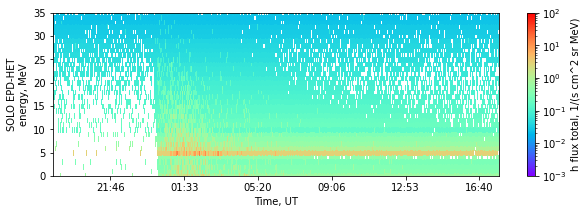

In [11]:
channels = None
ax, pas_omni = spectro_plot("amda/solo_het_omni_hflux", start, stop, 
                  channels=channels, 
                  xlabel="Time, UT",
                  ylabel="SOLO EPD-HET\nenergy, MeV", 
                  zlabel="h flux total, 1/(s cm^2 sr MeV)",
                  #yscale="log",
                  figsize=(10,3),
                  vmin=1e-3, vmax=1e2,
                  lognorm=True,
                           )



This is what the orginal data looks like when plotting each component independently

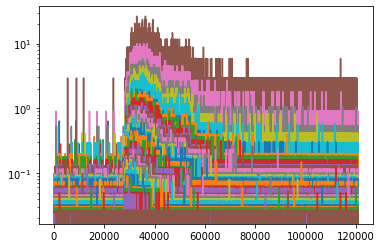

In [14]:
plt.plot(pas_omni.data)
plt.yscale("log")
plt.show()